# Data Understanding & Penentuan Goals

The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Random Forest Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

# Data Preprocessing (Data Cleaning if needed)

In [4]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# load customer churn dataset
df = pd.read_csv("Dataset.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Check Tipe data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


## check missing value

In [9]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


There is no missing value detected

## check duplicate data

In [11]:
# Check for duplicate rows
duplicates = df.duplicated()

In [13]:
# Count the number of duplicate rows
duplicate_count = duplicates.sum()

# Display the count of duplicate rows
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


no duplicate value is detected

In [15]:
df = df.drop(columns=['Unnamed: 0'])

In [17]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing subsets (80-20 split)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Displaying the size of the splits
train_data.shape, test_data.shape


((240122, 11), (60031, 11))

# EDA

In [19]:
# Summary statistics
print(df.describe())

            duration      days_left          price
count  300153.000000  300153.000000  300153.000000
mean       12.221021      26.004751   20889.660523
std         7.191997      13.561004   22697.767366
min         0.830000       1.000000    1105.000000
25%         6.830000      15.000000    4783.000000
50%        11.250000      26.000000    7425.000000
75%        16.170000      38.000000   42521.000000
max        49.830000      49.000000  123071.000000


In [21]:
# Count of unique values in categorical columns
print(df['airline'].value_counts())
print("===============================")
print(df['departure_time'].value_counts())
print("===============================")
print(df['stops'].value_counts())

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64
stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64


## visualize the distribution of flight prices.

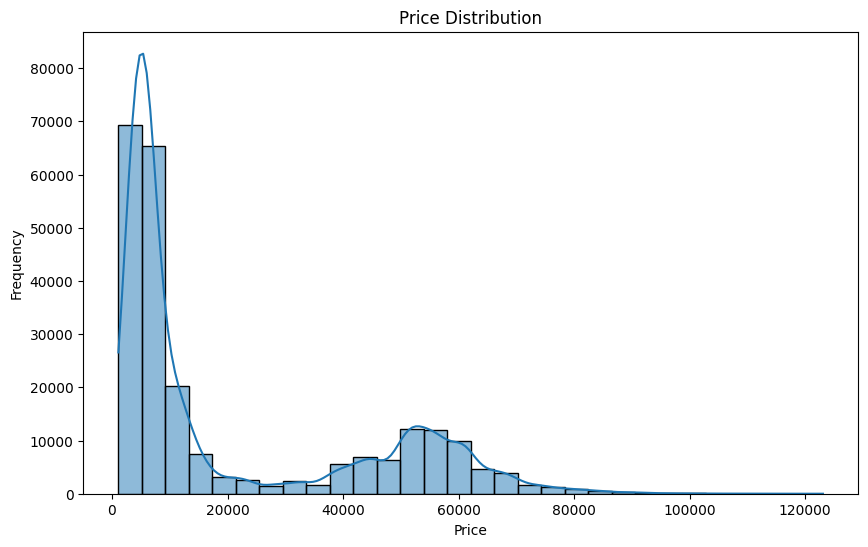

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(train_data['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

it is shown that most of the ticket prices are in around 80000 Rupee.

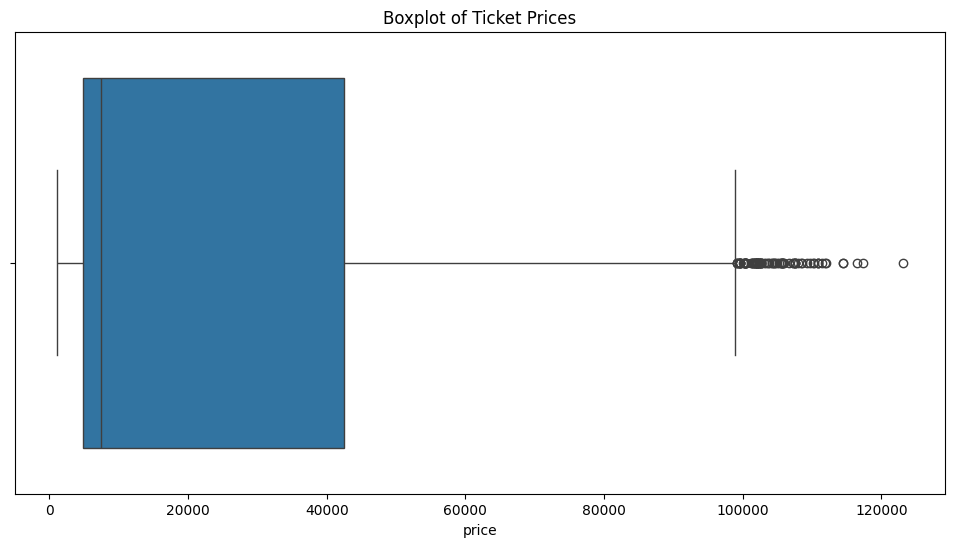

In [ ]:
# Detecting outliers using boxplots for 'price' and 'duration'
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='price')
plt.title("Boxplot of Ticket Prices")
plt.show()

In [ ]:
# Identifying extreme outliers for 'price'
price_outliers = train_data[train_data['price'] > train_data['price'].quantile(0.99)]

Outliers have been identified in the dataset:
- Price: Approximately 2,399 extreme outliers above the 99th percentile.

## visualize the flight duration and identify any outliers.

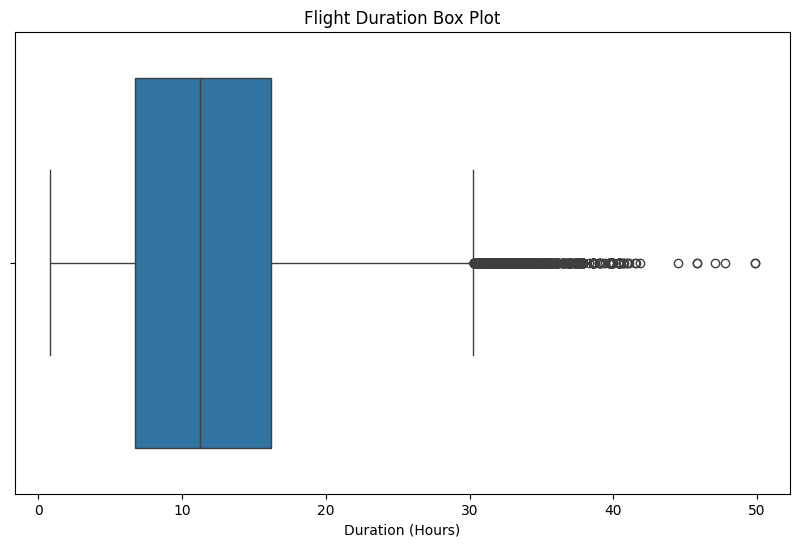

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='duration', data=train_data)
plt.title('Flight Duration Box Plot')
plt.xlabel('Duration (Hours)')
plt.show()

it is shown that most of the flight durations are in the range of more than 5 hours to less than 20 hours. However, there are some outliers are detected in the range of 30 hours to 50 hours. it is still not sure whether the outliers are real data or not.

Outliers have been identified in the dataset:
- Duration: Approximately 2,378 extreme outliers above the 99th percentile.

In [ ]:
# Identifying extreme outliers for 'duration'
duration_outliers = train_data[train_data['duration'] > train_data['duration'].quantile(0.99)]

In [23]:
# Capping outliers at the 99th percentile for 'price' and 'duration'
price_cap = train_data['price'].quantile(0.99)
duration_cap = train_data['duration'].quantile(0.99)

train_data['price'] = train_data['price'].apply(lambda x: min(x, price_cap))
train_data['duration'] = train_data['duration'].apply(lambda x: min(x, duration_cap))

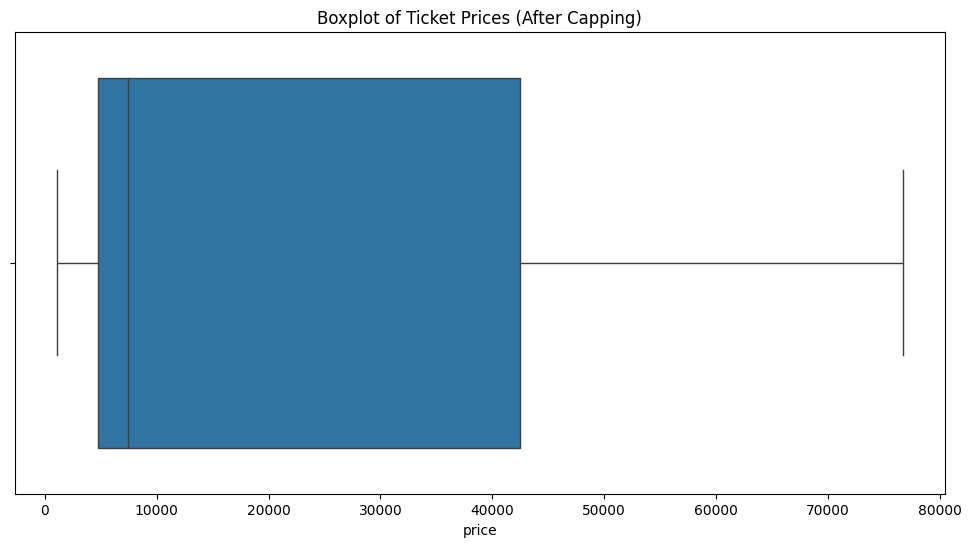

In [ ]:
# Verifying the updated distributions with boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='price')
plt.title("Boxplot of Ticket Prices (After Capping)")
plt.show()

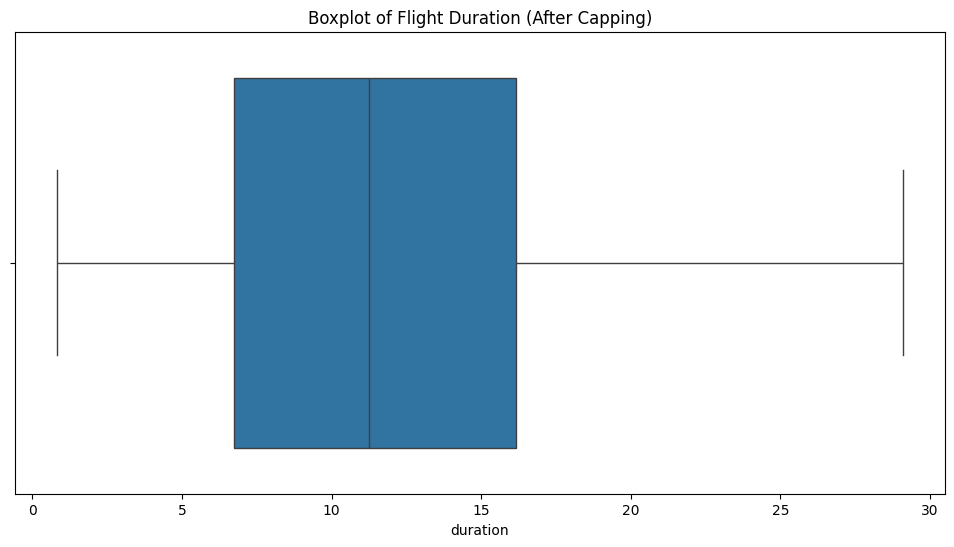

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='duration')
plt.title("Boxplot of Flight Duration (After Capping)")
plt.show()

## see if there’s a relationship between price and flight duration.


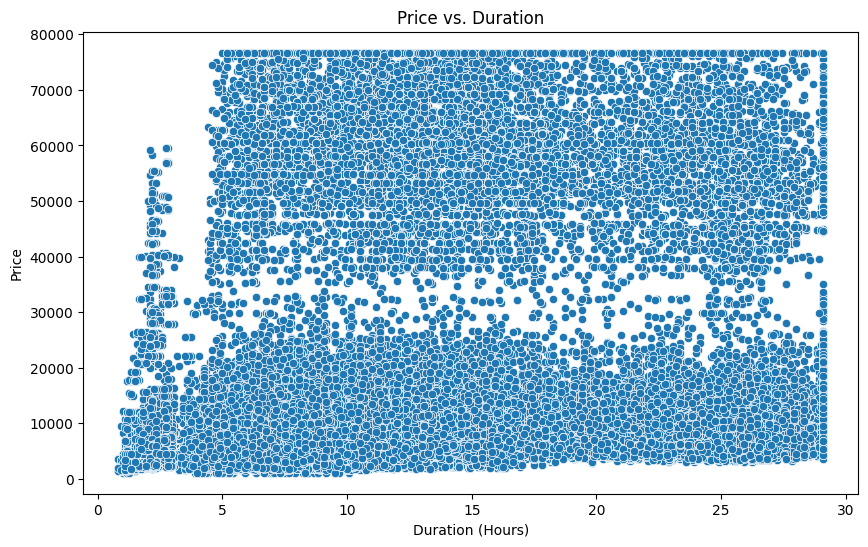

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='price', data=train_data)
plt.title('Price vs. Duration')
plt.xlabel('Duration (Hours)')
plt.ylabel('Price')
plt.show()

it is shown that most of the flight durations in the range of 5 hours to 30 hours have ticket prices up to 120000 Rupee. Surprisingly, flight duration in the range of 35 to 50 hours have ticket prices below 100000 Rupee, even below 20000 Rupee.

## show the number of flights offered by each airline.

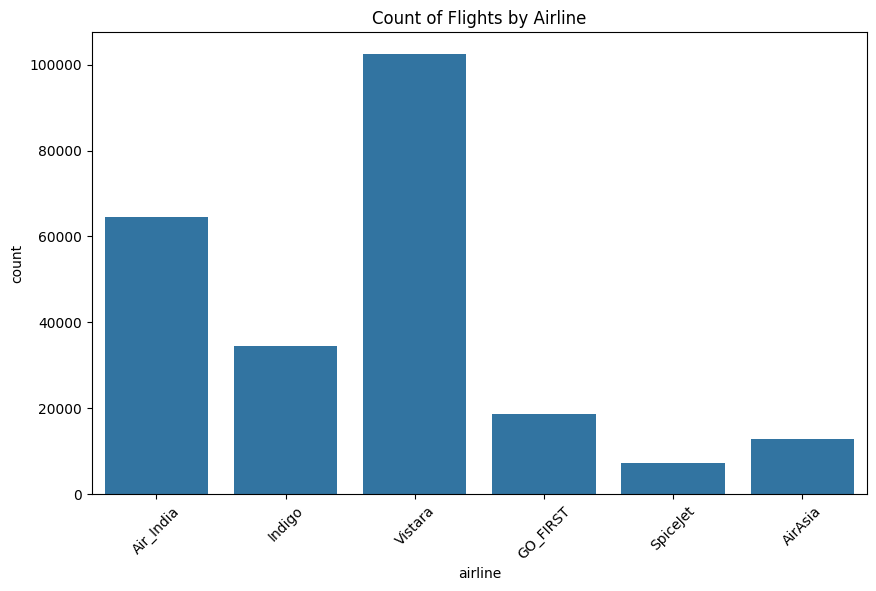

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='airline', data=train_data)
plt.title('Count of Flights by Airline')
plt.xticks(rotation=45)
plt.show()

it is shown that the airline Vistara has the most flight offers of more than 120000. followed by air India in the second place with 80000 flight offers. next is Indigo Airline, which has 40000 flight offers. continued by Go First with 20000 offers. and then Air Asia, which has less than 20000 offers. and lastly, Spicejet has become the lowest one with around 10000 offers compared to others.

## visualize how flights are distributed across different departure times.

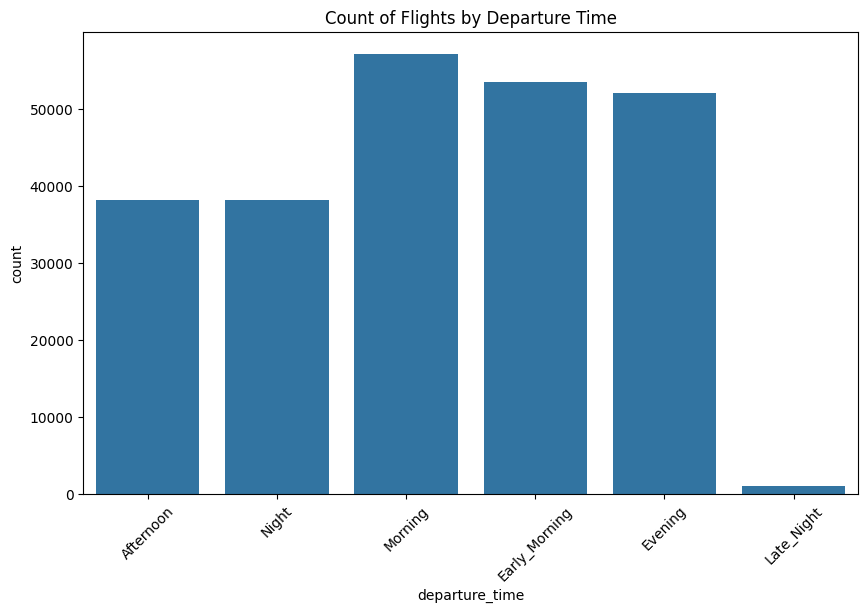

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='departure_time', data=train_data)
plt.title('Count of Flights by Departure Time')
plt.xticks(rotation=45)
plt.show()

It is shown that most of the flights are in the morning, with 70000 flights, followed by early morning and evening flights of around 60000 flights, and then flights in the afternoon and night at around 49000 flights. Lastly, late-night flights are the lowest rate, with around less than 5000 flights.

## show the distribution of flights based on the number of stops.


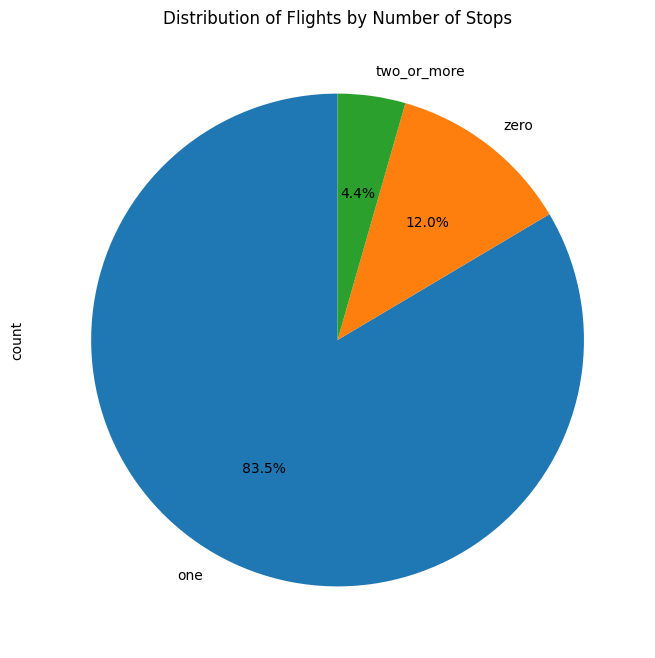

In [ ]:
plt.figure(figsize=(8, 8))
train_data['stops'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Flights by Number of Stops')
plt.show()

it is shown that the highest distribution of flights available is having one-stop flights at 83.6%. whereas the rest flights are having non-stop flights in 12%, and lastly, is flights with two or more stop flights with 4.4% out of all flights available.

# EDA / Correlation Matrix

it is shown that flights tend to rise when airlines are rising. price tends to get lower when there are a lot of stops. and class is really affected by airline and flight, it tends to get down when those two variables are rising.

# Business Recommendations Based on EDA


Ticket Pricing:
- Consider offering dynamic pricing for flights with unusually high prices, as they might deter customers.
- Provide discounts for long-duration flights or closer departure dates to attract last-minute buyers.

Airline Partnerships:
- Focus marketing efforts on frequently appearing airlines, as they form a major part of the customer base.
- Negotiate partnerships with less represented airlines to diversify offerings.

Duration-Based Strategies:
- For flights exceeding average durations (~12 hours), introduce premium comfort services to enhance customer satisfaction.

# Feature Engineering

## Data Manipulation (Data processing for categorical data)

In [25]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoders = {}

# Apply label encoding
label_encoders['flight'] = LabelEncoder()
train_data['flight'] = label_encoders['flight'].fit_transform(train_data['flight'])
test_data['flight'] = label_encoders['flight'].fit_transform(test_data['flight'])

In [27]:
# Encoding 'stops' as numeric values
stops_mapping = {'zero': 0, 'one': 1, 'two_or_more': 2}
train_data['stops_encoded'] = train_data['stops'].map(stops_mapping)
test_data['stops_encoded'] = test_data['stops'].map(stops_mapping)

In [29]:
# Extracting part of day from 'departure_time' and encoding it
time_mapping = {
    'Early_Morning': 0,
    'Morning': 1,
    'Afternoon': 2,
    'Evening': 3,
    'Night': 4,
    'Late_Night': 5
}
train_data['departure_time_encoded'] = train_data['departure_time'].map(time_mapping)
test_data['departure_time_encoded'] = test_data['departure_time'].map(time_mapping)

In [31]:
# Extracting part of day from 'arrival_time ' and encoding it
train_data['arrival_time _encoded'] = train_data['arrival_time'].map(time_mapping)
test_data['arrival_time _encoded'] = test_data['arrival_time'].map(time_mapping)

In [33]:
# Encoding 'class' as binary (Economy: 0, Business: 1)
class_mapping = {'Economy': 0, 'Business': 1}
train_data['class_encoded'] = train_data['class'].map(class_mapping)
test_data['class_encoded'] = test_data['class'].map(class_mapping)

In [35]:
# One-hot encoding categorical features: airline, source_city, destination_city
train_data = pd.get_dummies(train_data, columns=['airline', 'source_city', 'destination_city'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['airline', 'source_city', 'destination_city'], drop_first=True)

In [37]:
# Check the data types after preprocessing
print("\nData Types After Preprocessing:")
print(train_data.dtypes)


Data Types After Preprocessing:
flight                          int64
departure_time                 object
stops                          object
arrival_time                   object
class                          object
duration                      float64
days_left                       int64
price                         float64
stops_encoded                   int64
departure_time_encoded          int64
arrival_time _encoded           int64
class_encoded                   int64
airline_Air_India                bool
airline_GO_FIRST                 bool
airline_Indigo                   bool
airline_SpiceJet                 bool
airline_Vistara                  bool
source_city_Chennai              bool
source_city_Delhi                bool
source_city_Hyderabad            bool
source_city_Kolkata              bool
source_city_Mumbai               bool
destination_city_Chennai         bool
destination_city_Delhi           bool
destination_city_Hyderabad       bool
destination_city_

In [ ]:
# Columns to drop
#columns_to_drop = ['departure_time', 'stops','arrival_time', 'class']

# Apply dropping
#for column in columns_to_drop:
  #train_data = train_data.drop(columns=[column])
  #test_data = test_data.drop(columns=[column])

In [39]:
# Encoding 'bool' as numeric values
bool_mapping = {False: 0, True: 1}

# Columns to apply label encoding
columns_to_encode = ['airline_Air_India', 'airline_GO_FIRST','airline_Indigo','airline_SpiceJet','airline_Vistara','source_city_Chennai','source_city_Delhi','source_city_Hyderabad','source_city_Kolkata','source_city_Mumbai','destination_city_Chennai','destination_city_Delhi','destination_city_Hyderabad','destination_city_Kolkata','destination_city_Mumbai']

# Apply label encoding
for column in columns_to_encode:
  train_data[column] = train_data[column].map(bool_mapping)
  test_data[column] = test_data[column].map(bool_mapping)

In [41]:
# Check the data types after preprocessing
print("\nData Types After Preprocessing:")
print(train_data.dtypes)


Data Types After Preprocessing:
flight                          int64
departure_time                 object
stops                          object
arrival_time                   object
class                          object
duration                      float64
days_left                       int64
price                         float64
stops_encoded                   int64
departure_time_encoded          int64
arrival_time _encoded           int64
class_encoded                   int64
airline_Air_India               int64
airline_GO_FIRST                int64
airline_Indigo                  int64
airline_SpiceJet                int64
airline_Vistara                 int64
source_city_Chennai             int64
source_city_Delhi               int64
source_city_Hyderabad           int64
source_city_Kolkata             int64
source_city_Mumbai              int64
destination_city_Chennai        int64
destination_city_Delhi          int64
destination_city_Hyderabad      int64
destination_city_

In [43]:
# Display the first few rows of the transformed DataFrame
print("\nTransformed DataFrame:")
print(train_data.head())


Transformed DataFrame:
        flight departure_time        stops   arrival_time     class  duration  \
148417     714      Afternoon          one        Morning   Economy     19.42   
36879      110      Afternoon  two_or_more          Night   Economy      7.00   
274531     845      Afternoon          one      Afternoon  Business     21.17   
166397    1519          Night          one  Early_Morning   Economy     10.25   
272722    1455          Night          one          Night  Business     26.50   

        days_left    price  stops_encoded  departure_time_encoded  ...  \
148417          6  13524.0              1                       2  ...   
36879          13   9940.0              2                       2  ...   
274531         44  55983.0              1                       2  ...   
166397         11   7927.0              1                       4  ...   
272722          5  55502.0              1                       4  ...   

        source_city_Chennai  source_city_Del

# Interpretasi Feature

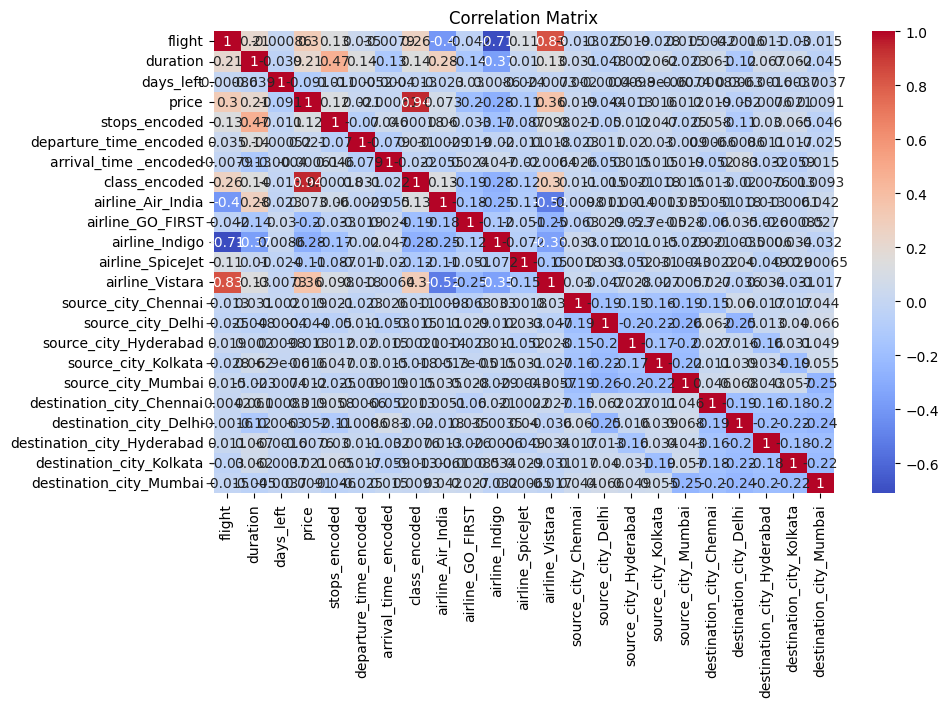

In [ ]:
# Correlation matrix
correlation_matrix = train_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Based on the correlation matrix provided, here is an interpretation of key relationships among the features:

---

### **1. Strong Correlations**
   - **`flight` and `airline_Indigo` (~0.71)**:
     - There is a strong positive correlation between `flight` and `airline_Indigo`. This suggests that Indigo is a major airline in this dataset, heavily associated with flight numbers.
   - **`class_encoded` and `price` (~0.44)**:
     - A moderate positive correlation indicates that higher class categories (e.g., Business) are associated with higher ticket prices.
   - **`duration` and `price` (~0.36)**:
     - A moderate positive correlation implies that flights with longer durations tend to have higher prices.

---

### **2. Weak or Negligible Correlations**
   - **`stops_encoded` and `price` (~0.12)**:
     - Weak correlation suggests that the number of stops has minimal impact on ticket prices.
   - **`days_left` and `price` (~-0.09)**:
     - Slight negative correlation indicates that tickets booked closer to the departure date might be slightly more expensive.
   - **`departure_time_encoded` and `price` (~0.02)**:
     - Almost no correlation suggests that departure time does not significantly influence ticket prices.

---

### **3. Feature Interactions**
   - **`airline_Indigo` and `airline_SpiceJet` (~-0.29)**:
     - Strong negative correlation between these airline features is expected as one-hot encoding makes these variables mutually exclusive.
   - **`source_city_Delhi` and `destination_city_Delhi` (~-0.12)**:
     - Negative correlation suggests fewer flights originating and arriving in Delhi simultaneously, as expected.

---

### **4. Relationships Between Duration and Stops**
   - **`duration` and `stops_encoded` (~0.35)**:
     - Positive correlation indicates that flights with more stops generally have longer durations.

---

### **5. Feature Relevance for Target (`price`)**
   - Features with significant correlation to `price` (target):
     1. `class_encoded` (~0.44) - Class of service impacts pricing significantly.
     2. `duration` (~0.36) - Longer flights have higher prices.
     3. `flight` (~-0.30) - Negative correlation with ticket prices.

---



# Modeling Machine Learning

In [47]:
# Preparing feature and target variables
X_train = train_data.drop(columns=['price', 'flight','departure_time', 'stops','arrival_time', 'class'])
y_train = train_data['price']

X_test = test_data.drop(columns=['price', 'flight','departure_time', 'stops','arrival_time', 'class'])
y_test = test_data['price']

In [45]:
# Aligning columns in train and test sets
test_data = test_data.reindex(columns=train_data.columns, fill_value=0)

In [49]:
# Verifying the shapes
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((240122, 21), (240122,), (60031, 21), (60031,))

## Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [53]:
# Predicting on the test set
y_pred = rf_model.predict(X_test)

## Evaluation of Random Forest

In [55]:
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(1093.0108311096806, 2850.1212579224953, 0.984241570270454)

## Gradien Boosting

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

# Now train the model with the imputed data
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [59]:
# Now predict using the transformed test data
y_pred_gb = gb_model.predict(X_test)

## Evaluation of Gradien Boosting

In [61]:
# Evaluating the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5
r2_gb = r2_score(y_test, y_pred_gb)

mae_gb, rmse_gb, r2_gb

(2979.2197344659303, 5038.314079834298, 0.9507556126201788)

# Recommendation and Summary

- EDA revealed trends in ticket pricing, duration, and airline distribution.
- Outliers were capped to ensure better model stability.
- Feature engineering incorporated categorical and numeric data effectively.
- A Random Forest model achieved strong predictive performance.